<a href="https://colab.research.google.com/github/MITNIK27/Devops-app/blob/main/Satellite_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install patchify

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [7]:
'''from google.colab import drive
drive.mount('/content/drive')'''



"from google.colab import drive\ndrive.mount('/content/drive')"

In [2]:
!ls '/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset'

 classes.json  'Tile 1'  'Tile 2'  'Tile 3'  'Tile 4'  'Tile 5'  'Tile 6'  'Tile 7'  'Tile 8'


In [3]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset'

In [4]:
dataset_name = 'Semantic segmentation dataset'

In [5]:
for path, subdirs,files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
   # print(images)
    for i, image_name in enumerate(images):
      if(image_name.endswith('.png')):
        #print(image_name)
         a = True

/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 6/masks


In [6]:
image_patch_size = 256

In [7]:
image = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile 2/images/image_part_001.jpg',1)

In [8]:
image_patches = patchify(image,(image_patch_size,image_patch_size,3),step= image_patch_size)

In [9]:
len(image_patches)

2

In [10]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [11]:
#MinMaxScaler
minmaxscaler = MinMaxScaler()

In [12]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)
image_y[0].shape

(256, 256, 3)

In [13]:
print(type(image))

<class 'numpy.ndarray'>


In [14]:
type(Image.fromarray(image))

PIL.Image.Image

In [15]:
image.shape

(544, 509, 3)

In [16]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [17]:
'''image_dataset= []

image_extension = 'jpg'
image_type = 'images' #images
for tile_id in range(1,8):
  for image_id in  range(1,20):
    image = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile {tile_id}/images/image_part_00{image_id}.{image_extension}',1)
    if image is not None:
      #print(image.shape)
      size_x =(image.shape[1]//image_patch_size)*image_patch_size
      size_y =(image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape,size_x,size_y))
      image= Image.fromarray(image)
      image = image.crop((0,0,size_x,size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))
      image= np.array(image)
      patched_images = patchify(image,(image_patch_size,image_patch_size,3),step= image_patch_size)
     # print(len(patched_images))
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          individual_patched_image =patched_images[i,j,:,:]
          #print(individual_patched_image.shape)
          individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
          individual_patched_image = individual_patched_image[0]
          #print(individual_patched_image.shape)
          image_dataset.append(individual_patched_image)'''

'image_dataset= []\n\nimage_extension = \'jpg\'\nimage_type = \'images\' #images\nfor tile_id in range(1,8):\n  for image_id in  range(1,20):\n    image = cv2.imread(f\'/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile {tile_id}/images/image_part_00{image_id}.{image_extension}\',1)\n    if image is not None:\n      #print(image.shape)\n      size_x =(image.shape[1]//image_patch_size)*image_patch_size\n      size_y =(image.shape[0]//image_patch_size)*image_patch_size\n      #print("{} --- {} - {}".format(image.shape,size_x,size_y))\n      image= Image.fromarray(image)\n      image = image.crop((0,0,size_x,size_y))\n      #print("({},  {})".format(image.size[0],image.size[1]))\n      image= np.array(image)\n      patched_images = patchify(image,(image_patch_size,image_patch_size,3),step= image_patch_size)\n     # print(len(patched_images))\n      for i in range(patched_images.shape[0]):\n        for j in range(patched_images.shape[1]):\n          individual_patche

In [18]:
#len(image_dataset)

In [19]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [20]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [21]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [22]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [23]:
type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size,3)))

numpy.ndarray

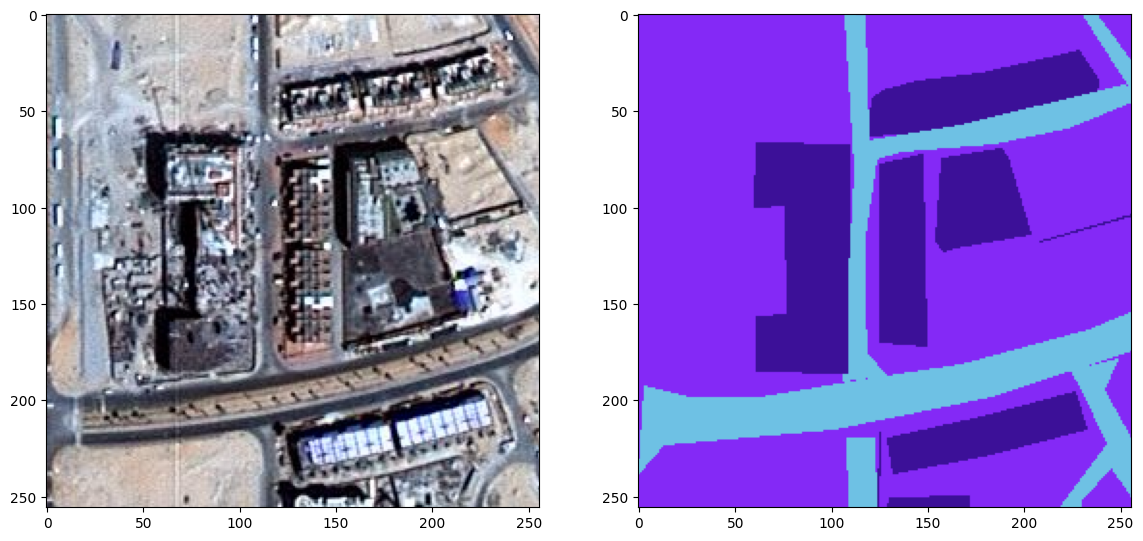

In [24]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [25]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road  = class_road .lstrip('#')
class_road  = np.array(tuple(int(class_road [i:i+2],16) for i in (0,2,4)))
print(class_road )

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_unlabeled)



[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [26]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape,dtype = np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)

  label_swgment = label_segment[:,:,0]
  return label_segment

In [27]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [28]:
print(len(labels))


945


In [29]:
label = np.array(labels)

In [30]:
labels[3]

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [31]:
labels = np.expand_dims(labels, axis=3)
labels[0]

array([[[[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]],

        ...,

        [[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]]],


       [[[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]],

        ...,

        [[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]]],


       [[[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]],

        ...,

        [[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]]],


       ...,


       [[[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]],

        ...,

        [[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]]],


       [[[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]],

        ...,

        [[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]]],


       [[[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]],

        ...,

        [[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]]]], dtype=uint8)

In [32]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [33]:
print("total unique labels based on masks:",format(np.unique(labels)))

total unique labels based on masks: [0 1 2 3 4 5]


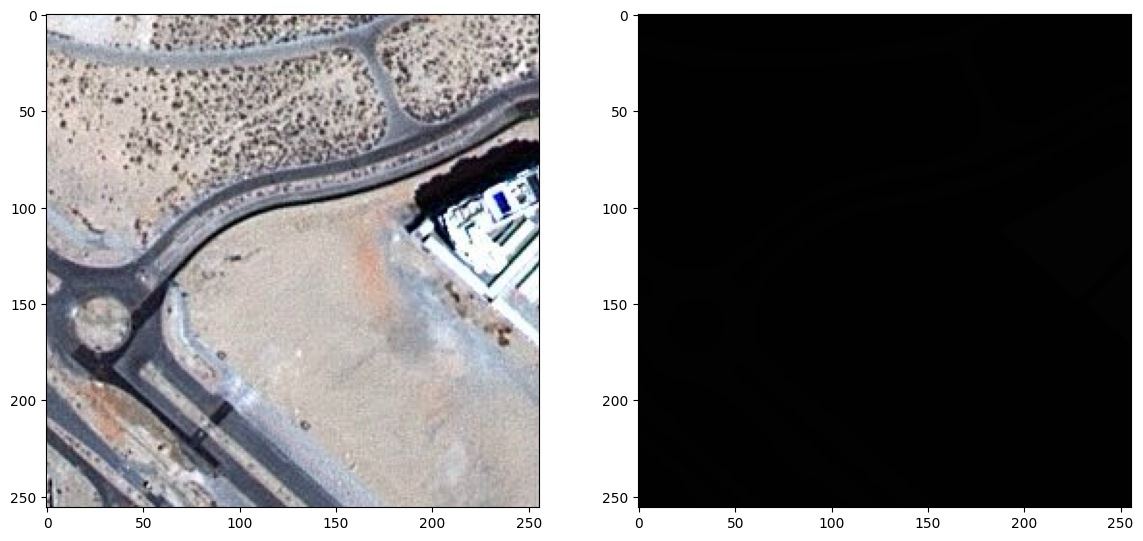

In [34]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [35]:
labels[0][:,:,0]

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [36]:
total_classes = len(np.unique(labels))
total_classes

6

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
labels_categorical_dataset = to_categorical(labels, num_classes = total_classes)
labels_categorical_dataset

array([[[[[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]],


         [[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]],


         [[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]],


         ...,


         [[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]],


         [[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]],


         [[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]]],



        [[[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]],


         [[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0., 0., 0.]]],


         [[[0., 1., 0., 0., 0., 0.],
           [0., 1., 0., 0

In [39]:
master_training_dataset = image_dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(master_training_dataset,labels_categorical_dataset, test_size= 0.15,random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

In [ ]:
image_height= X_train.shape[1]
image_width = X_train.shape[2]
image_channel = X_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)